In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

## **Data Reading:**

In [41]:
df = pd.read_csv('final_internship_data.csv')
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,26:21.0,4.5,6/15/2009 17:26,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,52:16.0,16.9,1/5/2010 16:52,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,35:00.0,5.7,8/18/2011 0:35,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,30:42.0,7.7,4/21/2012 4:30,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,51:00.0,5.3,3/9/2010 7:51,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


## **Data Cleaning & Preprocessing:**

In [42]:
df.shape

(500000, 26)

In [43]:
df.isnull()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
499998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [45]:
df[df.isnull()].head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [47]:
df.duplicated().sum()

0

In [48]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075902,2428.348683,2428.730838,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595970,30167.285790,30159.407300,30162.285360,12399.956430,3.141593


In [49]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [50]:
df.drop('User Name',axis=1,inplace = True)
df.drop('Driver Name',axis=1,inplace = True)
df.drop('User ID',axis=1,inplace = True)
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,26:21.0,4.5,6/15/2009 17:26,-1.288826,0.710721,-1.288779,0.710563,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,52:16.0,16.9,1/5/2010 16:52,-1.291824,0.710546,-1.291182,0.711780,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,35:00.0,5.7,8/18/2011 0:35,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,30:42.0,7.7,4/21/2012 4:30,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,51:00.0,5.3,3/9/2010 7:51,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


## **Dealing With Missing Values:**

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

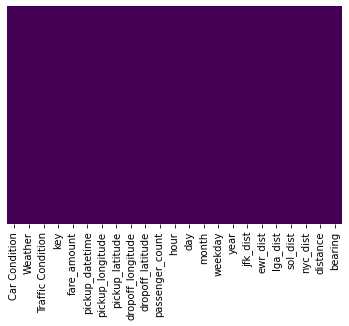

In [53]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [54]:
# Converting to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['year'] = df['pickup_datetime'].dt.year
df.drop('pickup_datetime', axis=1, inplace=True)
df.head()


,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,26:21.0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,52:16.0,16.9,-1.291824,0.710546,-1.291182,0.711780,1,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,35:00.0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,30:42.0,7.7,-1.291319,0.710927,-1.291396,0.711363,1,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,51:00.0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


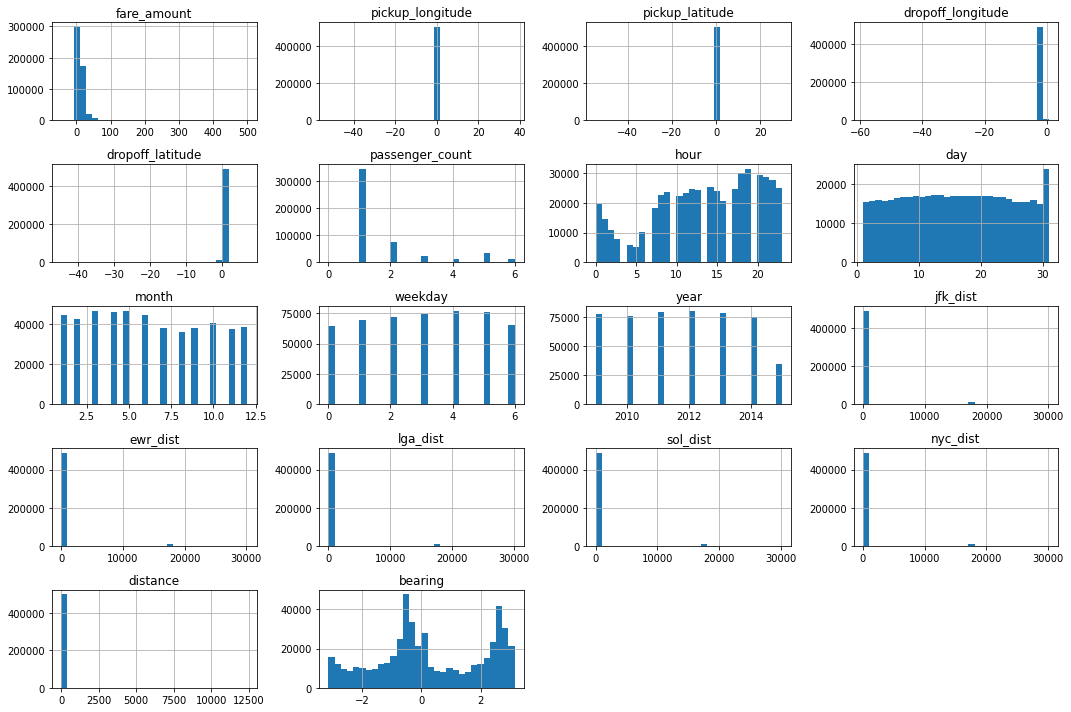

In [55]:
numerical = df.select_dtypes(include=['float64', 'int64'])
numerical.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


In [56]:
# Categorical features
categorical = df.select_dtypes(include='object')

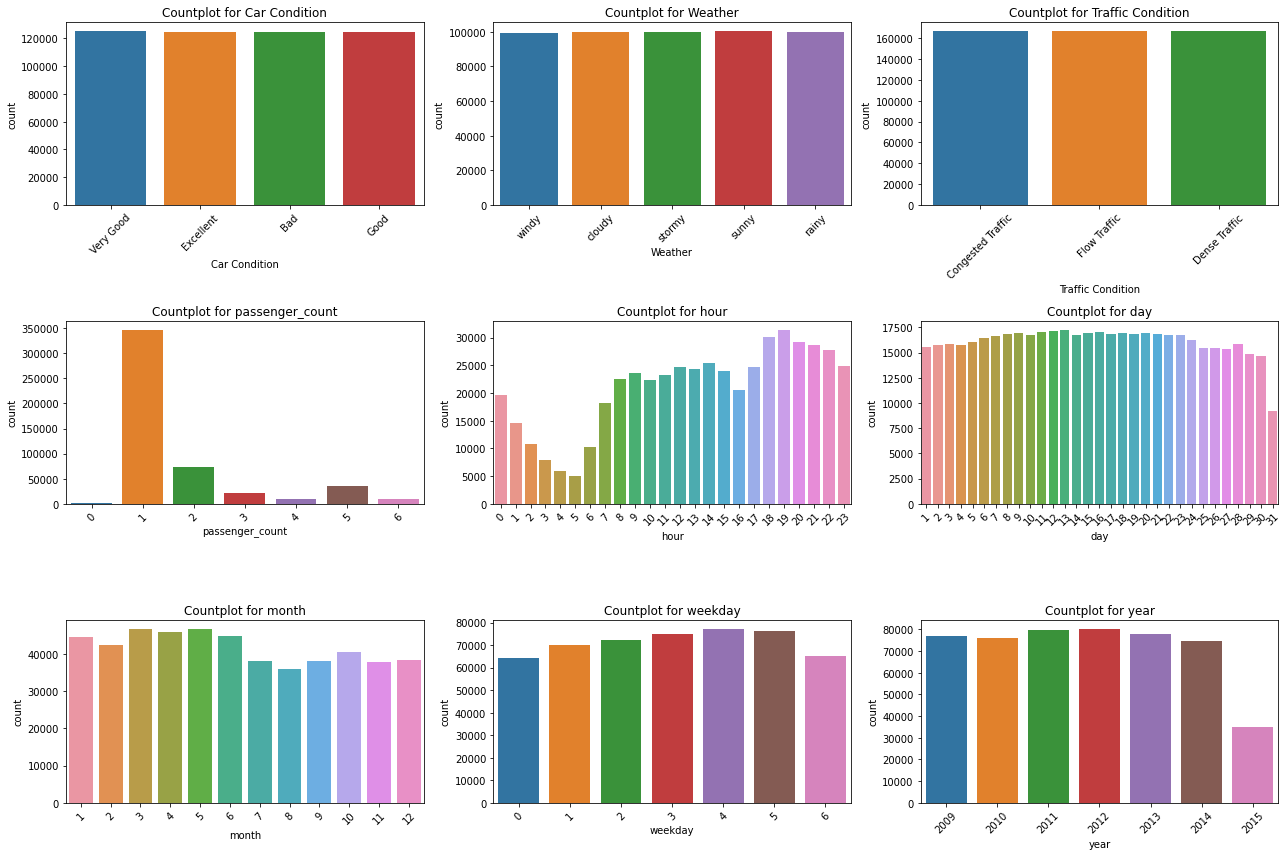

In [ ]:
cols = ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year']
n_cols = 3  
n_rows = -(-len(cols) // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()  

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot for {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


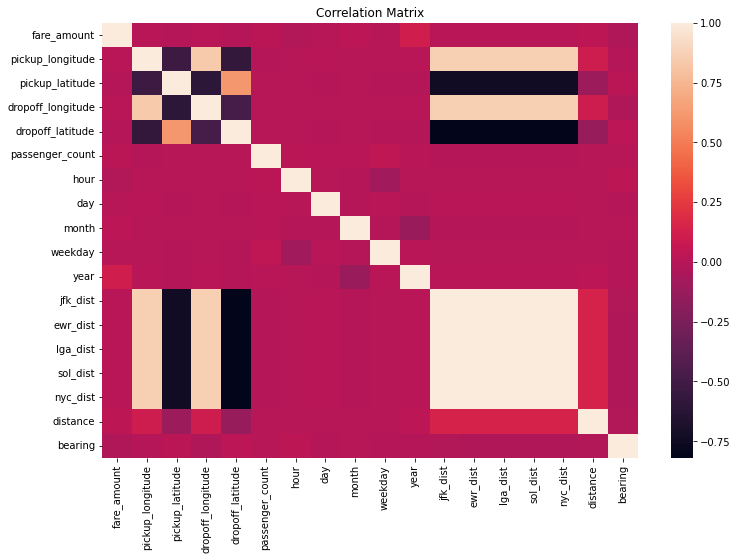

In [58]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Data Visualization:**

### **How does the fare amount vary with weather conditions?**

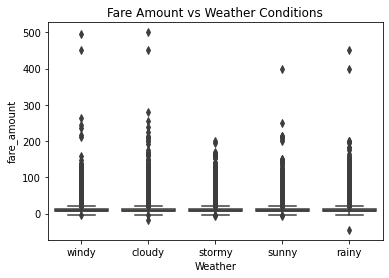

In [86]:
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.title("Fare Amount vs Weather Conditions")
plt.show()

### **What is the distribution of fare amounts?**

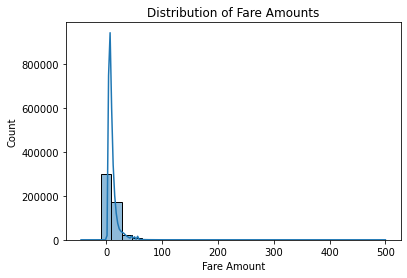

In [60]:
sns.histplot(df['fare_amount'], bins=30, kde=True)
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount")
plt.show()

### **Are there clusters of pickup/dropoff locations?**

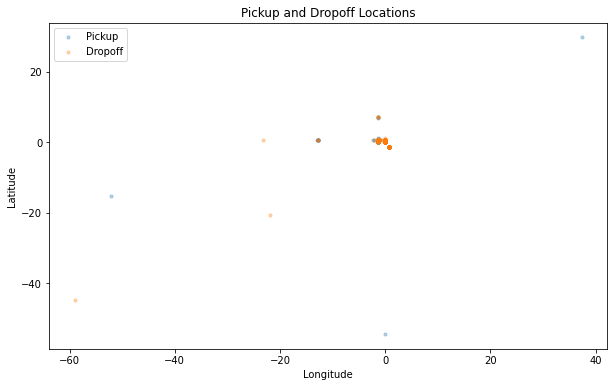

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=10, alpha=0.3, label='Pickup')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=10, alpha=0.3, label='Dropoff')
plt.legend()
plt.title("Pickup and Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### **What is the relationship between distance and fare amount?**

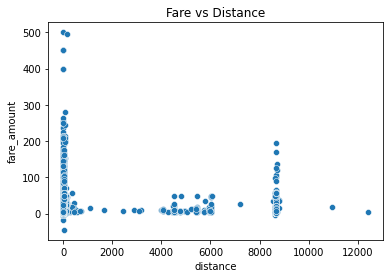

In [62]:
sns.scatterplot(x='distance', y='fare_amount', data=df)
plt.title("Fare vs Distance")
plt.show()

### **How do fares vary over months or years?**

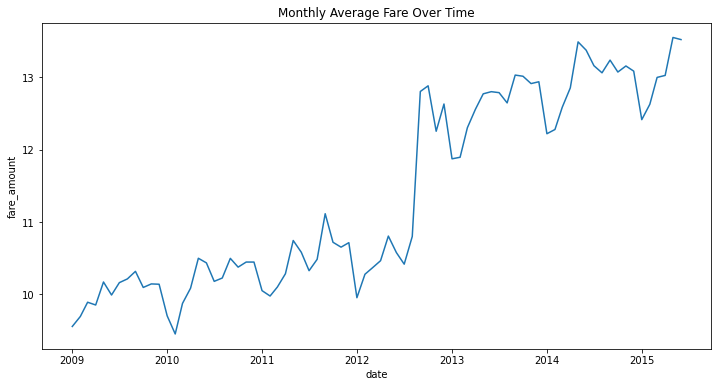

In [63]:
monthly_avg = df.groupby(['year', 'month'])['fare_amount'].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='fare_amount', data=monthly_avg)
plt.title("Monthly Average Fare Over Time")
plt.show()


### **Do better car conditions lead to higher fares?**

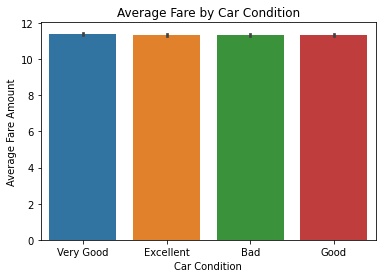

In [64]:
sns.barplot(x='Car Condition', y='fare_amount', data=df)
plt.title("Average Fare by Car Condition")
plt.xlabel("Car Condition")
plt.ylabel("Average Fare Amount")
plt.show()


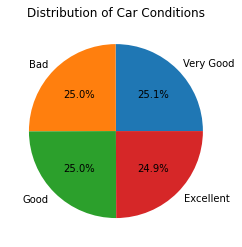

In [66]:
df["Car Condition"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Distribution of Car Conditions")
plt.show()


### **What is the most common number of passengers?**

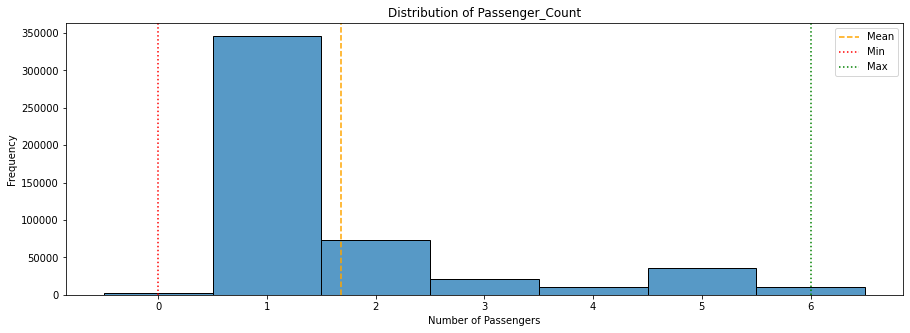

In [65]:
feature = 'passenger_count'
plt.figure(figsize=(15, 5))

sns.histplot(df[feature], bins=range(int(df[feature].min()), int(df[feature].max()) + 2), kde=False, discrete=True)

plt.axvline(df[feature].mean(), color='orange', linestyle='--', label='Mean')
plt.axvline(df[feature].min(), color='red', linestyle=':', label='Min')
plt.axvline(df[feature].max(), color='green', linestyle=':', label='Max')

plt.title(f'Distribution of {feature.title()}')
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### **Which weekday has the most trips?**

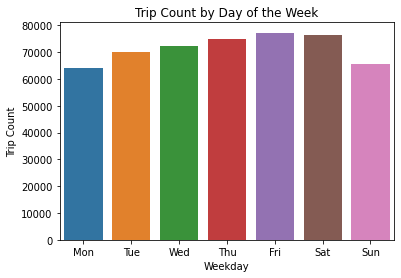

In [67]:
weekday_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(dict(enumerate(weekday_map)))

sns.countplot(x='weekday_name', data=df, order=weekday_map)
plt.title("Trip Count by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Trip Count")
plt.show()


### **Which weekday has the most trips?**

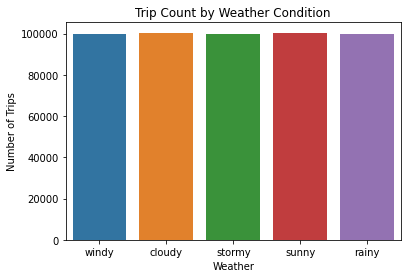

In [68]:
sns.countplot(x='Weather', data=df)
plt.title("Trip Count by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Trips")
plt.show()


### **How do the weather effect on the average of the fare prices?**

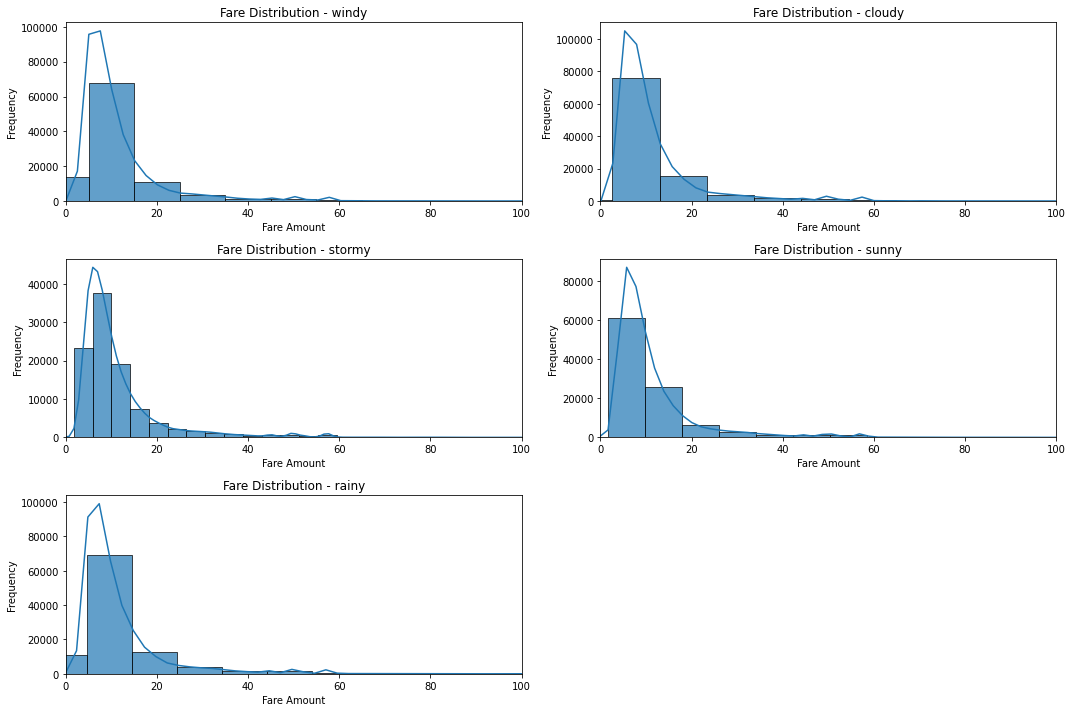

In [ ]:
# what effect does this have on average fare prices?
weather_types = df["Weather"].unique()  

plt.figure(figsize=(15, 10))

for i, weather in enumerate(weather_types, 1):
    plt.subplot(3, 2, i)
    subset = df[df["Weather"] == weather]["fare_amount"]

    if not subset.empty: 
        sns.histplot(subset, bins=50, kde=True, alpha=0.7)
        plt.title(f"Fare Distribution - {weather}")
        plt.xlabel("Fare Amount")
        plt.ylabel("Frequency")
        plt.xlim(0, 100)
    else:
        plt.text(0.5, 0.5, "No Data", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### **How does the distribution of weather conditions vary by month?**

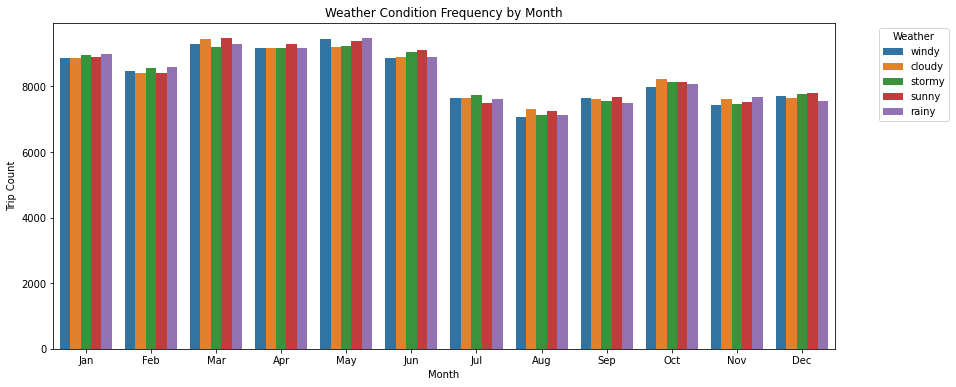

In [74]:
# Convert month numbers to names 
df['month_name'] = df['month'].apply(lambda x: pd.to_datetime(f'2024-{x}-01').strftime('%b'))

plt.figure(figsize=(14, 6))
sns.countplot(x='month_name', hue='Weather', data=df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Weather Condition Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Trip Count")
plt.legend(title="Weather", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **Outliers Detection:**

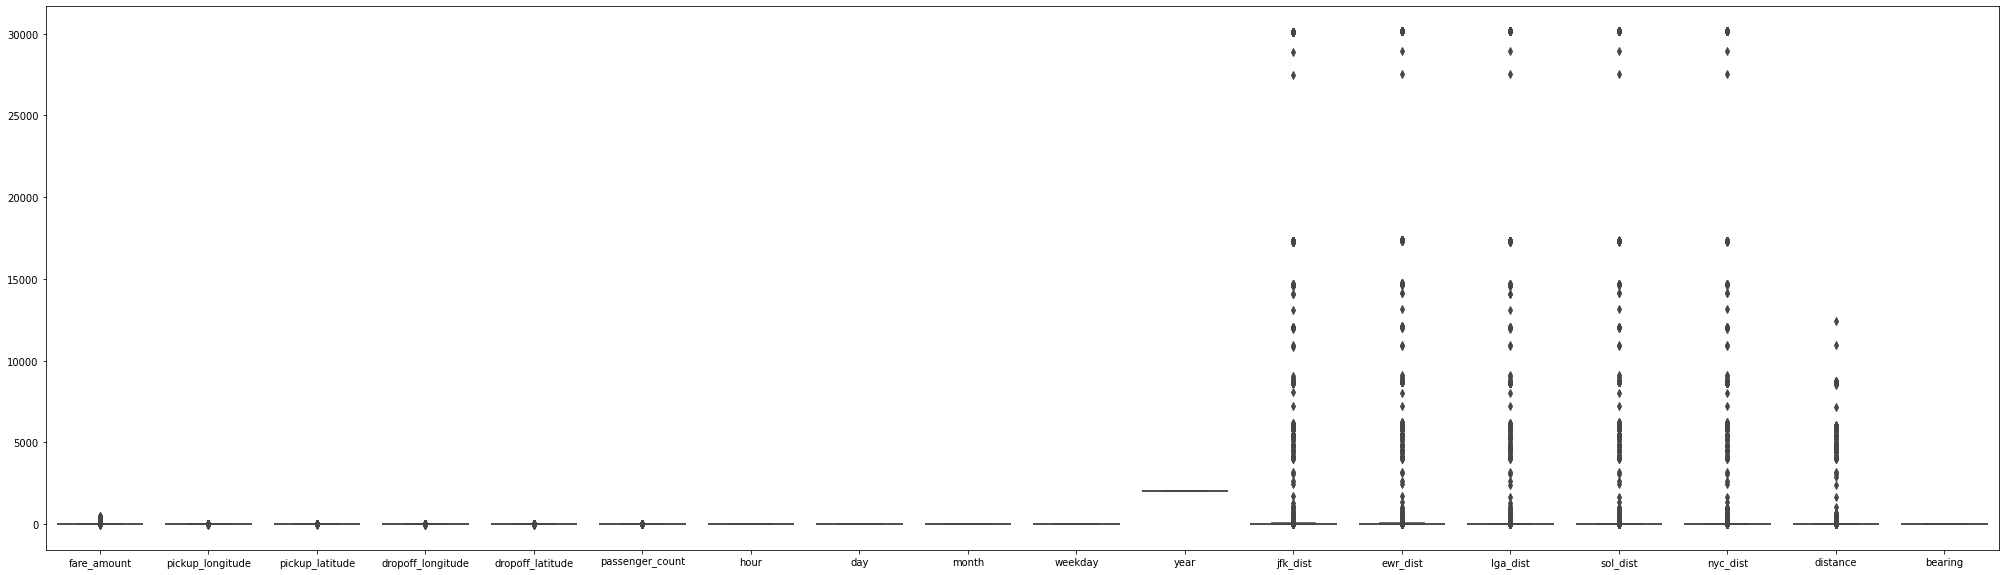

In [77]:
plt.figure(figsize=(35, 10))
sns.boxplot(data=df) 
plt.show()
